In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob
import os

In [117]:
# Read our results

data = dict()

results_csvs = glob(os.path.join(os.pardir, "results", "*.csv"))
for file_path in results_csvs:
    df = pd.read_csv(file_path)
    file_name = file_path.split("/")[-1]
    instance_name = file_name.split("_")[0]
    # Drop the cvs extension
    method_name = file_name.split("_")[-1][:-4]
    if instance_name not in data.keys():
        data[instance_name] = dict()
    data[instance_name][method_name] = df
data

{'had20.dat': {'greedy':    run                                           solution  evaluation  \
  0    0  [5, 13, 6, 1, 10, 9, 11, 4, 19, 17, 18, 16, 14...        7078   
  1    1  [2, 13, 18, 5, 17, 9, 6, 1, 15, 11, 10, 16, 19...        7110   
  2    2  [7, 12, 1, 10, 9, 6, 11, 17, 2, 5, 13, 15, 14,...        7006   
  3    3  [3, 0, 5, 8, 6, 17, 13, 16, 15, 11, 9, 10, 4, ...        6956   
  4    4  [14, 15, 18, 5, 13, 6, 11, 9, 0, 10, 1, 16, 19...        7006   
  5    5  [7, 14, 18, 13, 5, 17, 6, 10, 0, 11, 9, 16, 1,...        6930   
  6    6  [14, 0, 18, 7, 13, 17, 6, 10, 15, 11, 9, 4, 2,...        6944   
  7    7  [19, 10, 6, 16, 0, 17, 18, 13, 15, 11, 9, 2, 4...        7044   
  8    8  [7, 14, 5, 0, 13, 18, 17, 10, 15, 11, 9, 4, 2,...        6944   
  9    9  [7, 14, 2, 17, 9, 15, 18, 1, 16, 0, 11, 10, 5,...        7104   
  
     iterations  time  
  0         823     8  
  1         812     7  
  2         494     5  
  3         723     6  
  4         978     7  
  5  

In [118]:
# Read solutions
data_path = os.path.join(os.pardir, "data", "qapdatsol")
for instance in data.keys():
    solution_file = instance[:-3] + "sln"
    print(solution_file)
    full_path = os.path.join(data_path, solution_file)

    f = open(full_path, "r")
    first_line = f.readline().strip().split(" ")
    n, opt = int(first_line[0]), float(first_line[-1])
    data[instance]["n"] = n
    data[instance]["opt"] = opt
    opt_sol = []
    while True:
        line = f.readline()
        if not line:
            break
        elements = [ele for ele in line.strip().split(" ") if len(ele) > 0]
        # Additional comma split if necessary
        if len(elements) == 1:
            elements = elements[0].split(",")
        elements = list(map(int, elements))
        opt_sol.extend(elements)
    f.close()

had20.sln
nug30.sln
nug15.sln
esc128.sln
tai60a.sln
bur26c.sln
wil100.sln
els19.sln


In [119]:
# Sort instances by size
data = dict(sorted(data.items(), key=lambda tup: tup[1]["n"]))

In [120]:
for instance in data.keys():
    print(instance, data[instance].keys())

nug15.dat dict_keys(['steepest', 'heuristic', 'random-walk', 'random', 'greedy', 'n', 'opt'])
els19.dat dict_keys(['greedy', 'random-walk', 'heuristic', 'steepest', 'random', 'n', 'opt'])
had20.dat dict_keys(['greedy', 'heuristic', 'random', 'random-walk', 'steepest', 'n', 'opt'])
bur26c.dat dict_keys(['random-walk', 'heuristic', 'random', 'greedy', 'steepest', 'n', 'opt'])
nug30.dat dict_keys(['random-walk', 'random', 'steepest', 'greedy', 'heuristic', 'n', 'opt'])
tai60a.dat dict_keys(['steepest', 'random-walk', 'heuristic', 'random', 'greedy', 'n', 'opt'])
wil100.dat dict_keys(['heuristic', 'steepest', 'random', 'greedy', 'random-walk', 'n', 'opt'])
esc128.dat dict_keys(['heuristic', 'steepest', 'random-walk', 'greedy', 'random', 'n', 'opt'])


In [121]:
import matplotlib
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
cmap = matplotlib.colormaps["tab10"]

In [122]:
list(data.keys())

['nug15.dat',
 'els19.dat',
 'had20.dat',
 'bur26c.dat',
 'nug30.dat',
 'tai60a.dat',
 'wil100.dat',
 'esc128.dat']

In [123]:
# Common for plots
instance_sizes = [data[instance]["n"] for instance in data.keys()]
methods = ['random-walk', 'heuristic', 'random', 'greedy', 'steepest']

In [124]:
instance_sizes

[15, 19, 20, 26, 30, 60, 100, 128]

# Quality

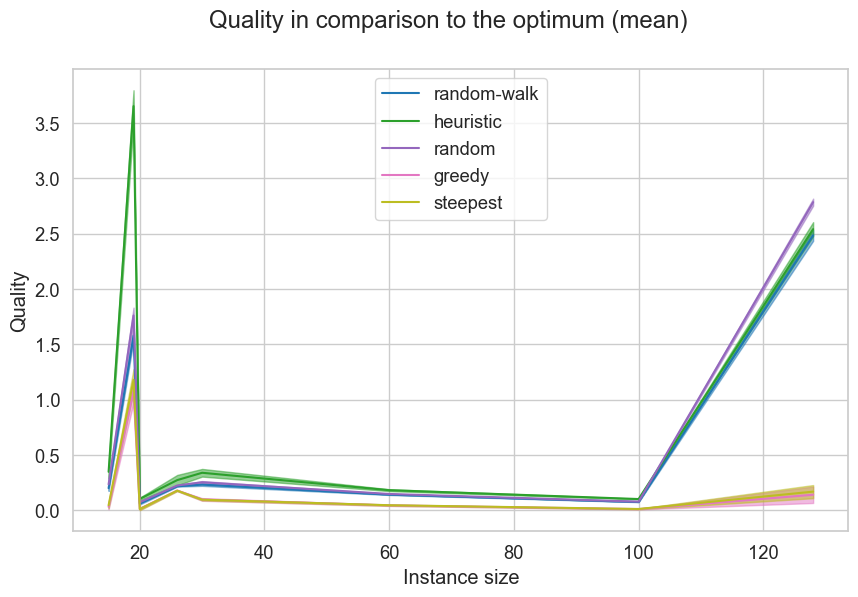

In [137]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    variations = []
    for instance in data.keys():
        instance_mean = data[instance][method]["evaluation"].mean()
        # Coefficient of vatioation is std/mean
        coeff_of_variation = data[instance][method]["evaluation"].std() / instance_mean
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
        variations.append(coeff_of_variation)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.fill_between(instance_sizes, means - variations,
                    means + variations,
                    color=color, alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (mean)")
plt.legend()
plt.show()

# Quality - best case

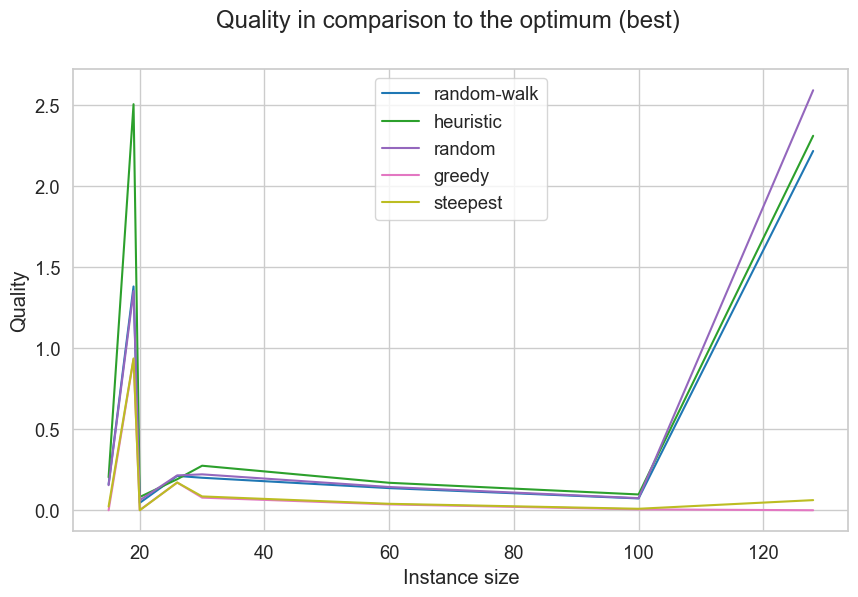

In [138]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    for instance in data.keys():
        instance_mean = data[instance][method]["evaluation"].min()
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (best)")
plt.legend()
plt.show()

# Quality - worst case

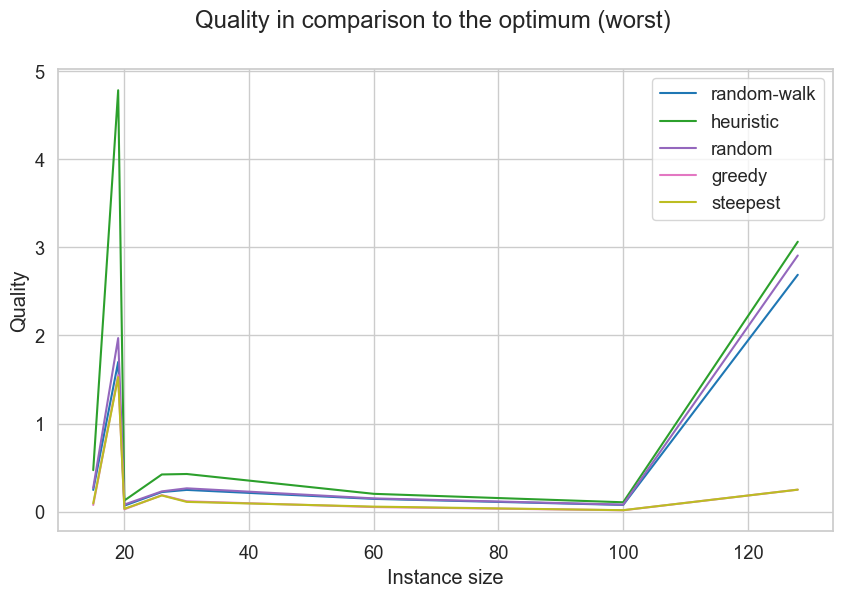

In [139]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    for instance in data.keys():
        instance_mean = data[instance][method]["evaluation"].max()
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (worst)")
plt.legend()
plt.show()

# Running Time

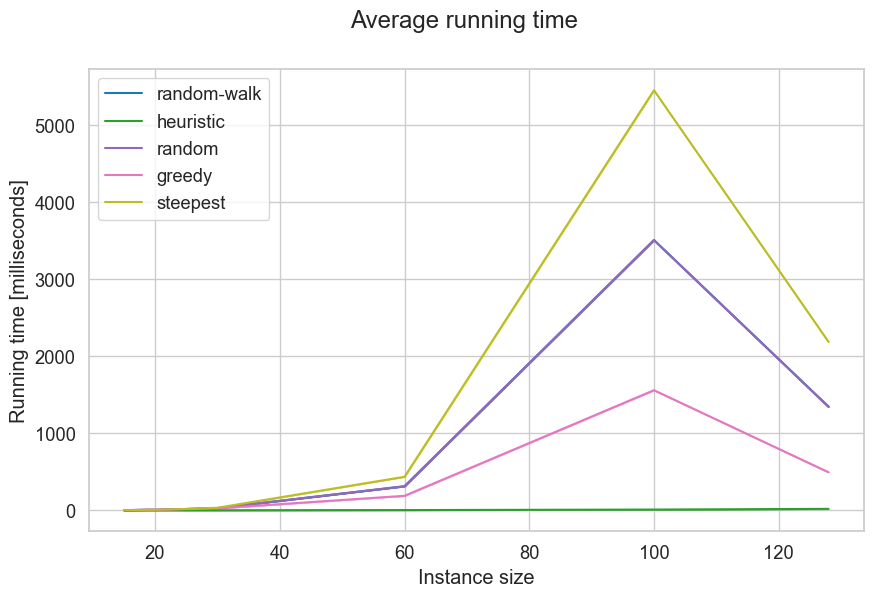

In [140]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    variations = []
    for instance in data.keys():
        instance_mean = data[instance][method]["time"].mean()
        # Coefficient of vatioation is std/mean
        coeff_of_variation = data[instance][method]["time"].std() / (instance_mean + 1e-5)
        means.append(instance_mean)
        variations.append(coeff_of_variation)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.fill_between(instance_sizes, means-variations,
                    means + variations,
                    color=color, alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Running time [milliseconds]")

fig.suptitle("Average running time")
plt.legend()
plt.show()

# Efficiency (Quality vs time)

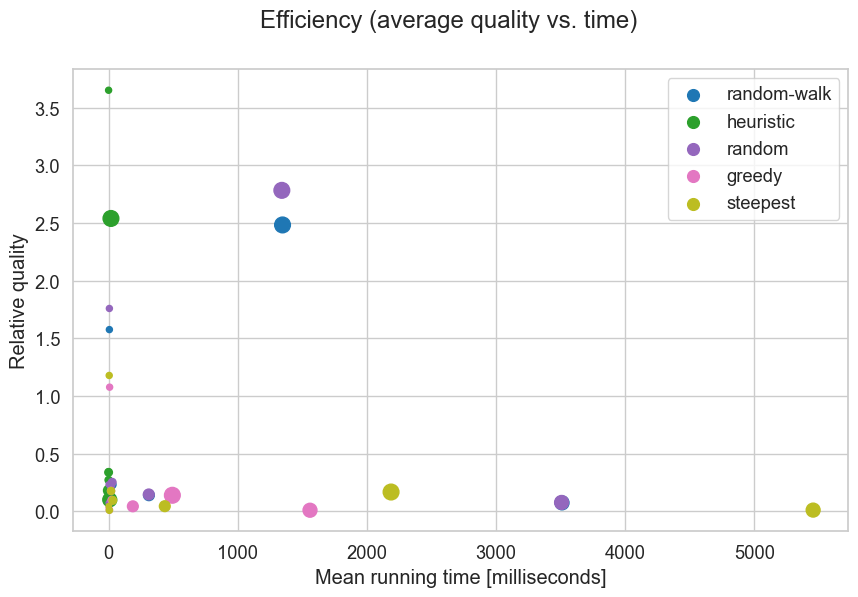

In [142]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    quality_means = []
    time_means = []
    for instance in data.keys():
        quality_mean = data[instance][method]["evaluation"].mean()
        diff = (quality_mean - data[instance]["opt"])/data[instance]["opt"]
        time_mean = data[instance][method]["time"].mean()
        quality_means.append(diff)
        time_means.append(time_mean)
    color = color=cmap(float(i/len(methods)))
    ax.scatter(time_means, quality_means, s=instance_sizes, label = method, color=color)
    ax.set_xlabel("Mean running time [milliseconds]")
    ax.set_ylabel("Relative quality")

fig.suptitle("Efficiency (average quality vs. time)")
plt.legend()
plt.show()

# G,S: average number of algorithm steps (step = changing the current solution)